In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
 
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from pandas import  DataFrame
from sklearn.linear_model import ARDRegression,BayesianRidge,LinearRegression, LogisticRegression,TweedieRegressor, PoissonRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.cluster import KMeans

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow

In [2]:
url1=r'C:\Users\Wdtum\Downloads\Датасет для ВКР_композиты (1)\X_bp.xlsx'
df1=pd.read_excel(url1) 
url2=r'C:\Users\Wdtum\Downloads\Датасет для ВКР_композиты (1)\X_nup.xlsx'
df2=pd.read_excel(url2) 

df1.rename(columns={df1.columns[0]:'id'}, inplace=True)
df2.rename(columns={df2.columns[0]:'id'}, inplace=True)

In [3]:
df=df1.merge(df2, how='inner',on='id')
df=df.drop(['id'], axis=1)
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [5]:
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [6]:
df.nunique ()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

<AxesSubplot:>

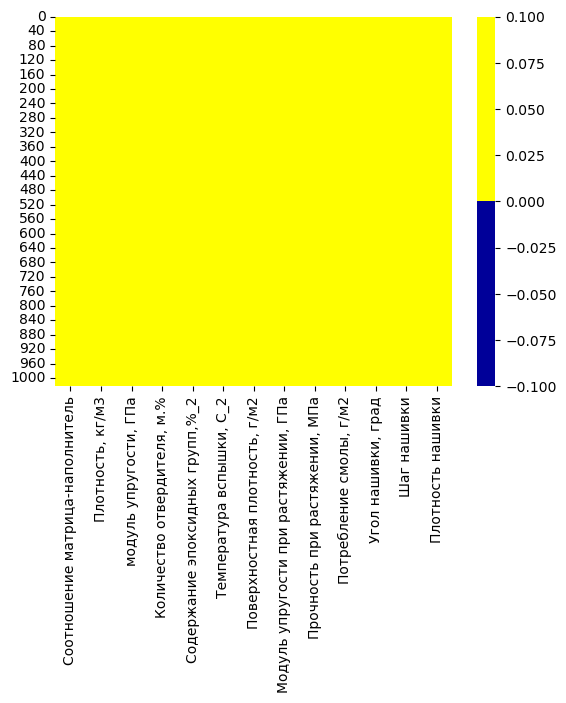

In [9]:
#тепловая карта пропущенных значений
# желтый -не пропущенные  , синий -пропущенные данные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

In [10]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

<AxesSubplot:>

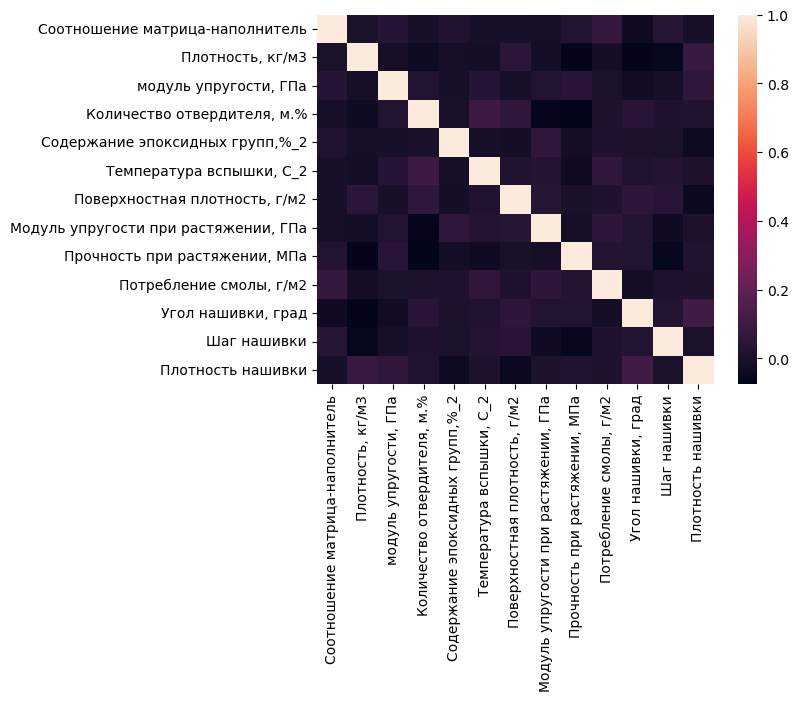

In [11]:
sns.heatmap(df.corr())

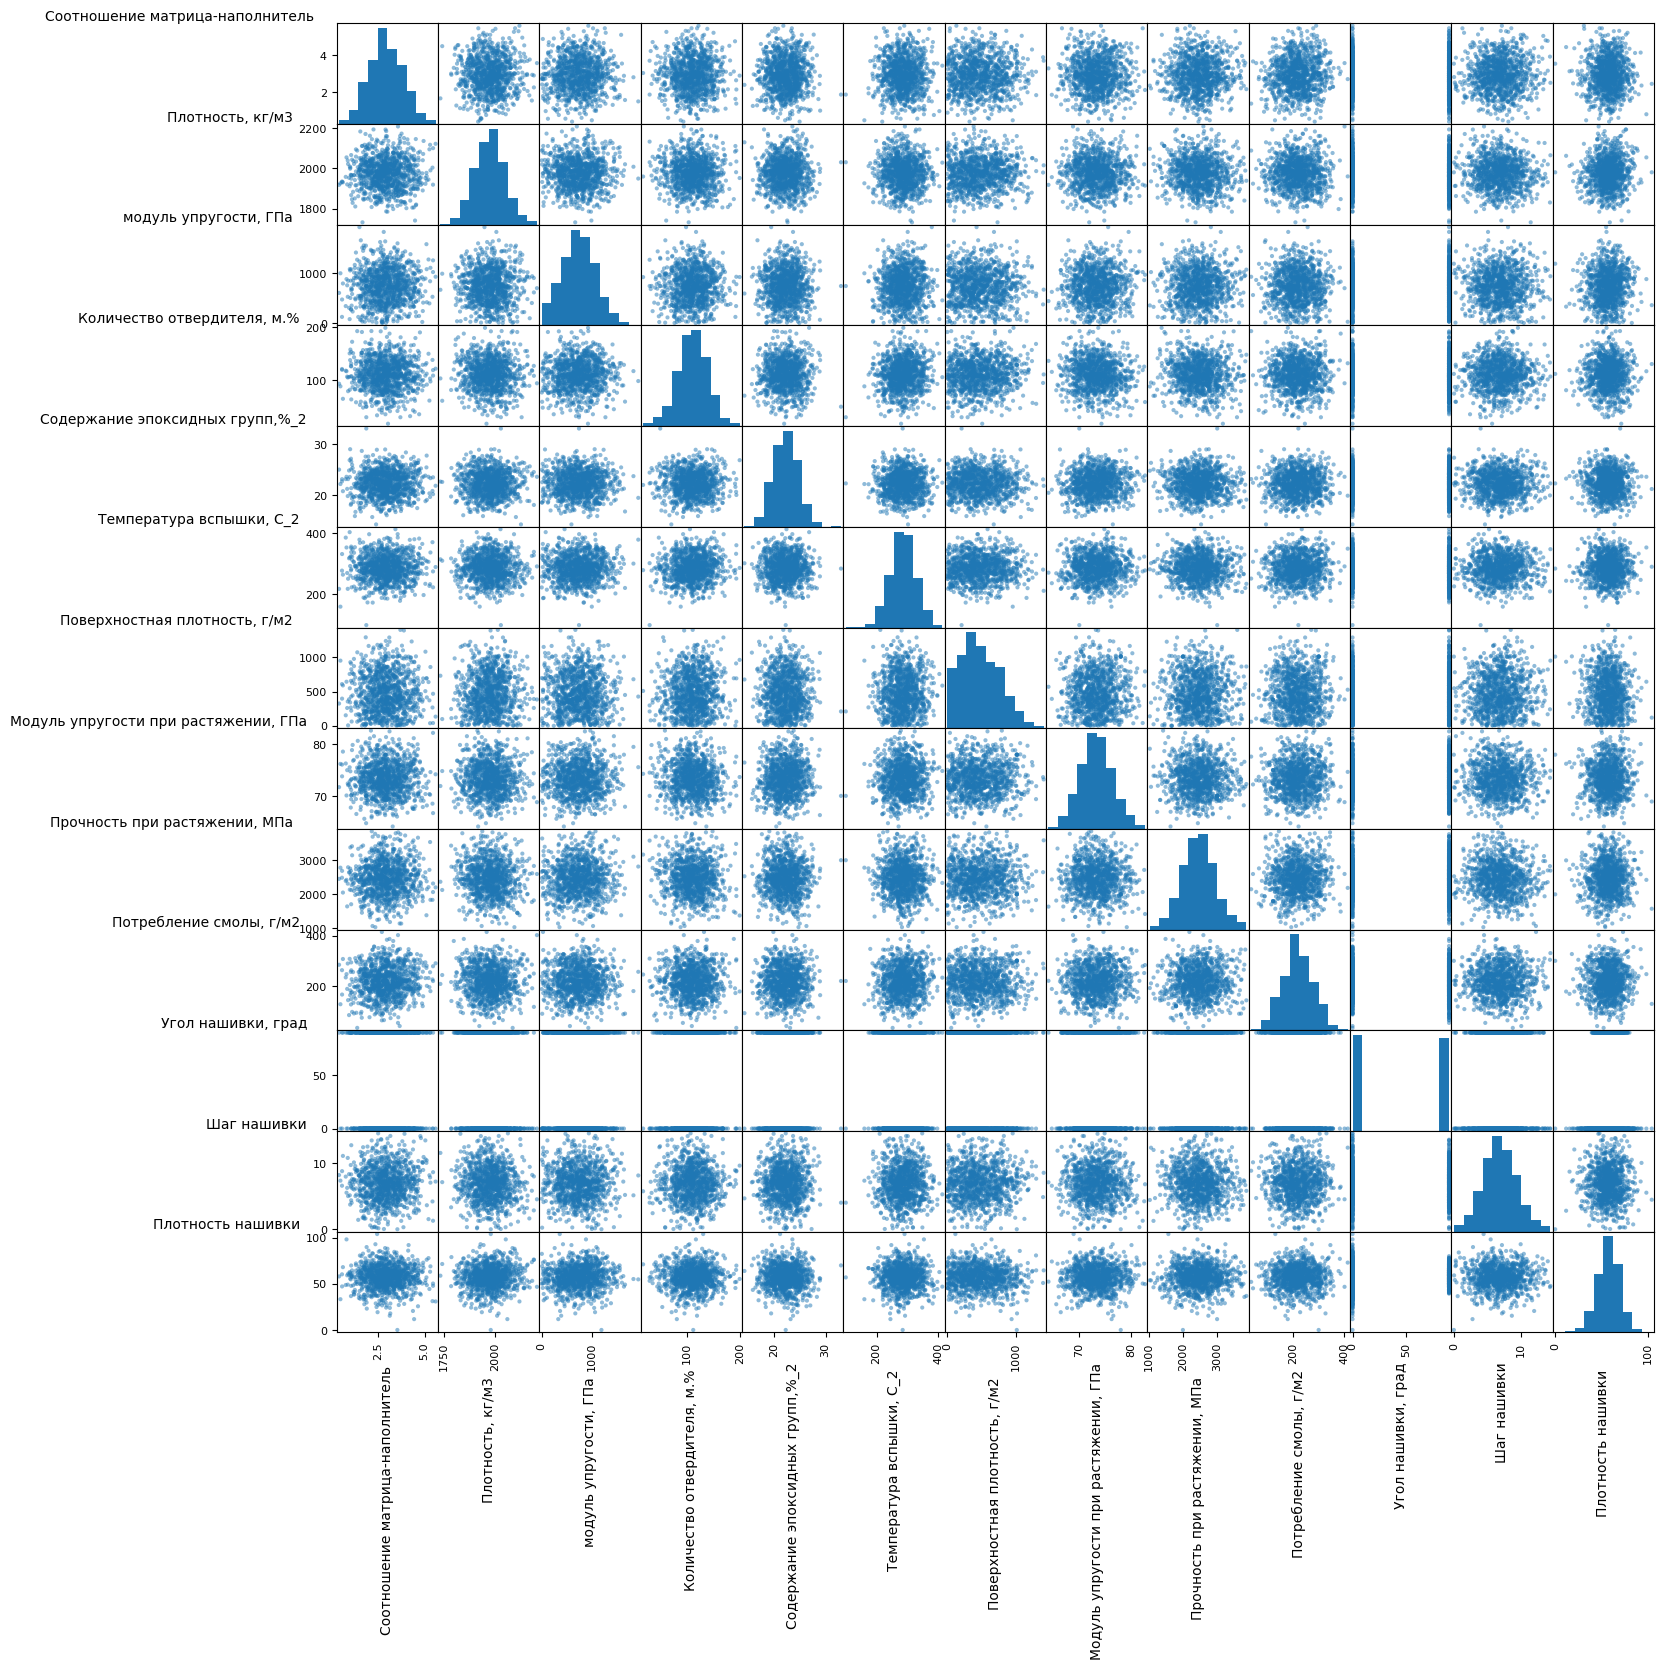

In [10]:
from pandas.plotting import scatter_matrix
  
# selecting three numerical features
features = list(df)
   
# plotting the scatter matrix
#with the features
#scatter_matrix(df[features],alpha=0.5, figsize=(18, 18), diagonal='kde')
for ax in scatter_matrix(df[features],alpha=0.5, figsize=(17, 17), diagonal='hist').ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0,loc='top')
plt.show()

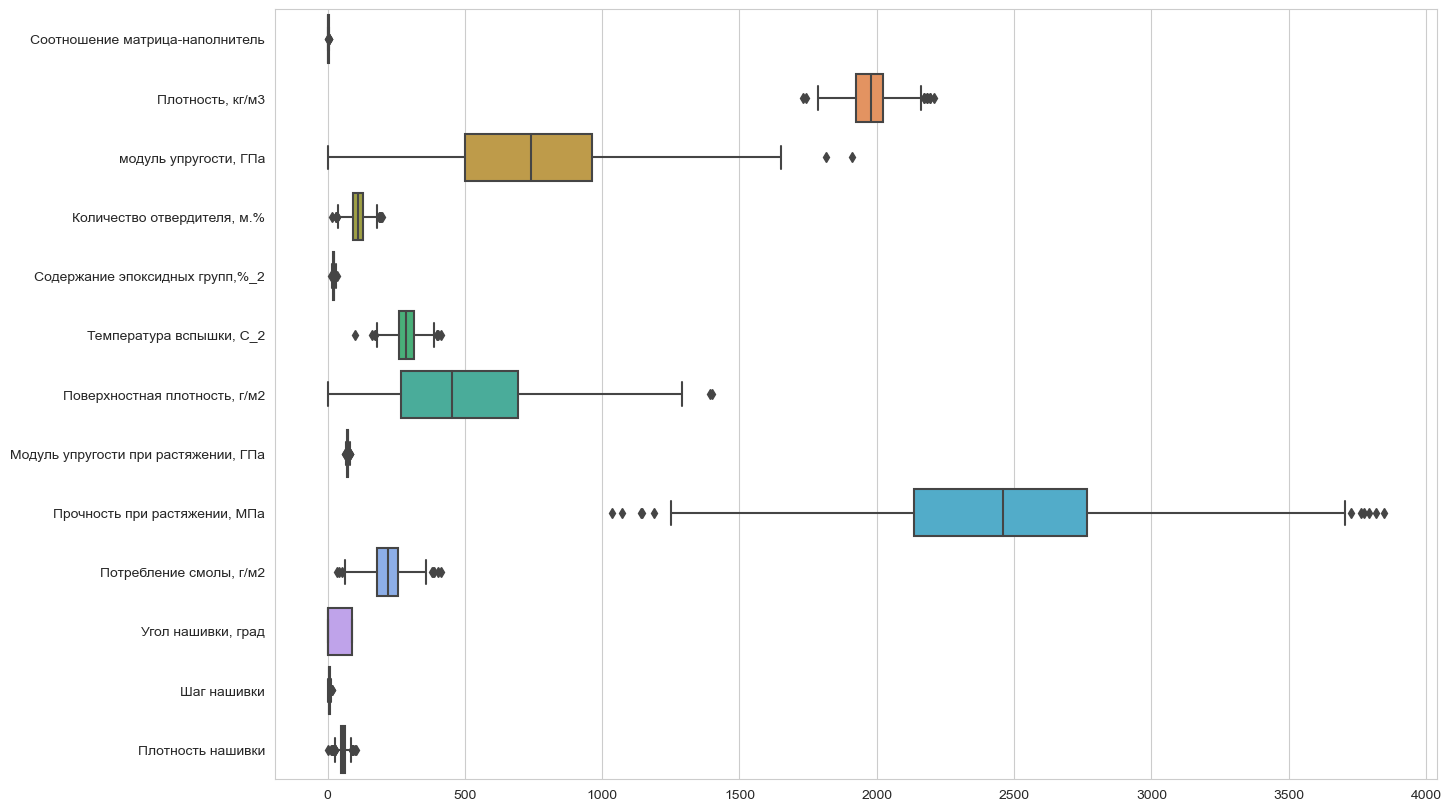

In [11]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 10)) 
sns.boxplot( data = df,orient="h")
plt.show()

<AxesSubplot:>

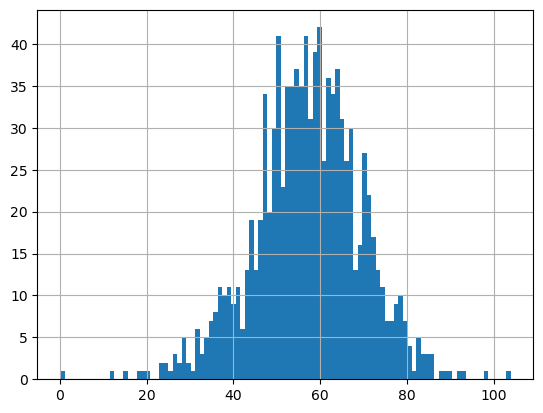

In [12]:
df['Плотность нашивки'].hist(bins=100)

In [13]:
import numpy as np
from scipy import stats

def grubbs_stat(y):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations / std_dev
    print(f"Grubbs Statistics Value: {Gcal}")
    return Gcal, max_ind

def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    print(f"Grubbs Critical Value: {critical_value}")
    return critical_value
abst=[]
def check_G_values(Gs, Gc, inp, max_index):
    
    if Gs > Gc:
        
        print(f"{inp[max_index]} is an outlier")
        abst.append('T')
    else:
        
        print(f"{inp[max_index]} is not an outlier")
        abst.append('F')
    return abst
def ESD_test(input_series, alpha, max_outliers):
    for iteration in range(max_outliers):
        Gcritical = calculate_critical_value(len(input_series), alpha)
        Gstat, max_index = grubbs_stat(input_series)
        check_G_values(Gstat, Gcritical, input_series, max_index)
        input_series = np.delete(input_series, max_index)
    print(abst)   

In [14]:
ESD_test(np.array(df['модуль упругости, ГПа']), 0.1, 52)

Grubbs Critical Value: 3.8826134768727774
Grubbs Statistics Value: 3.5495887413635465
1911.53647700054 is not an outlier
Grubbs Critical Value: 3.882365857996975
Grubbs Statistics Value: 3.28190816645569
1815.86516990736 is not an outlier
Grubbs Critical Value: 3.8821179756877218
Grubbs Statistics Value: 2.7913511082953324
1649.41570587587 is not an outlier
Grubbs Critical Value: 3.8818698294001215
Grubbs Statistics Value: 2.7376586521669077
1628.0 is not an outlier
Grubbs Critical Value: 3.881621418587463
Grubbs Statistics Value: 2.7093653952395305
1615.09697286127 is not an outlier
Grubbs Critical Value: 3.881372742702873
Grubbs Statistics Value: 2.6388461171691353
1588.67721742116 is not an outlier
Grubbs Critical Value: 3.8811238011949905
Grubbs Statistics Value: 2.597817058384441
1572.09604227992 is not an outlier
Grubbs Critical Value: 3.8808745935134183
Grubbs Statistics Value: 2.5275316681881734
1546.29088574472 is not an outlier
Grubbs Critical Value: 3.8806251191043937
Grubbs

In [89]:
y_lasso=np.array(df[['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа' ]])
X_lasso=np.array(df.drop(['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа'], axis=1))


In [90]:
X_train, X_test,y_train,y_test=train_test_split(X_lasso,y_lasso,test_size=0.3,random_state=0)

In [95]:
from sklearn import linear_model

# создаю объект линейной регрессии
clf = linear_model.Lasso()

# обучаю модель на созданных данных
mod=clf.fit(X_train, y_train[:,0])
mod_1=clf.fit(X_train, y_train[:,1])
#Проверяю, сколько и какие признаки модель посчитала информативными:
count = 0
for i in mod.coef_:
    if i != 0:
        count += 1
count_1 = 0
for i in mod_1.coef_:
    if i != 0:
        count_1 += 1
# Модель посчитала информативными 12 признаков
tmp=[]
tmp1=[]
print(f'Модель отобрала {count} признаков; настоящее количество информативных признаков: 11')
for i in range(len(mod.coef_)):
    if mod.coef_[i]!=0:
        tmp.append(mod.coef_[i])
print(tmp)
print(f'Модель отобрала {count_1} признаков; настоящее количество информативных признаков: 11')
for i in range(len(mod_1.coef_)):
    if mod.coef_[i]!=0:
        tmp1.append(mod_1.coef_[i])
#print(mod_1.coef_)
print(tmp1)

Модель отобрала 9 признаков; настоящее количество информативных признаков: 11
[-0.6272322622930844, 0.05595166823863393, -1.4555276327437334, -4.089616500027632, -0.539589452208078, -0.06812491270957552, 0.16749028486530756, 0.1361245883551556, -11.938772208822172]
Модель отобрала 9 признаков; настоящее количество информативных признаков: 11
[-0.6272322622930844, 0.05595166823863393, -1.4555276327437334, -4.089616500027632, -0.539589452208078, -0.06812491270957552, 0.16749028486530756, 0.1361245883551556, -11.938772208822172]


In [6]:
#убираем соотношение матрица наполнитель и плотность нашивки 
y=np.array(df[['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа' ]])
X=np.array(df.drop(['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Соотношение матрица-наполнитель','Плотность нашивки'  ],axis=1))

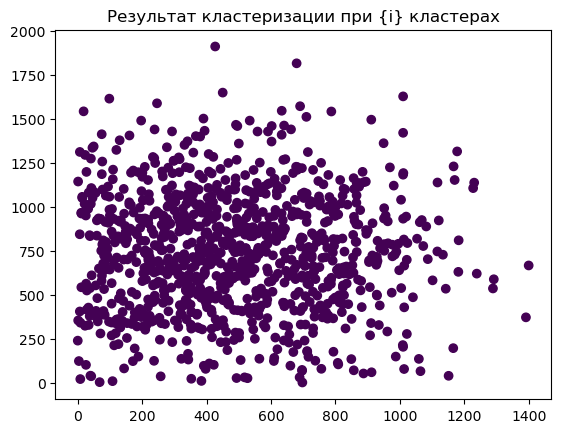

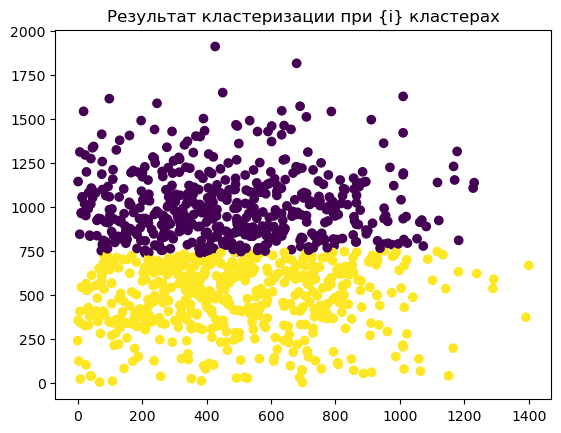

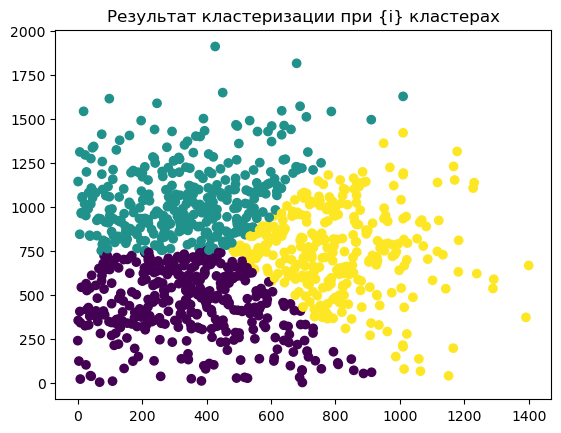

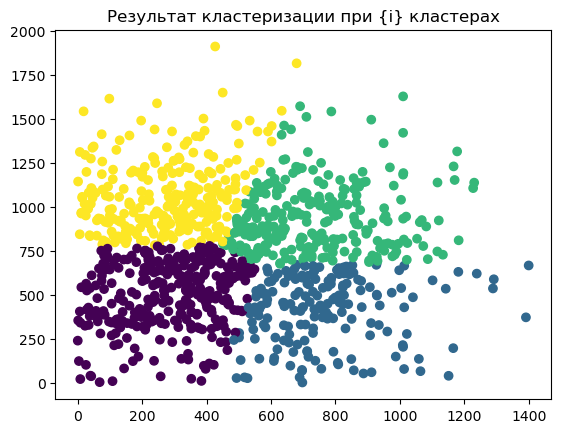

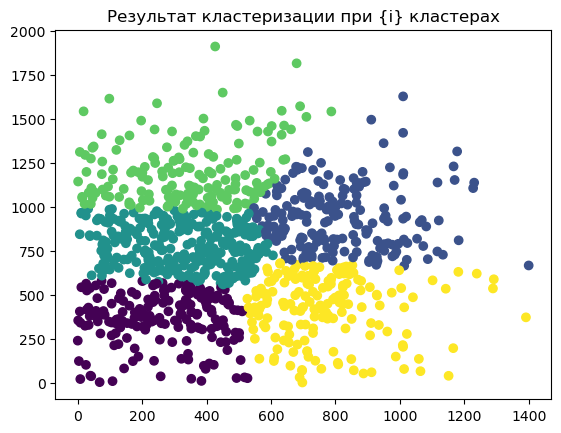

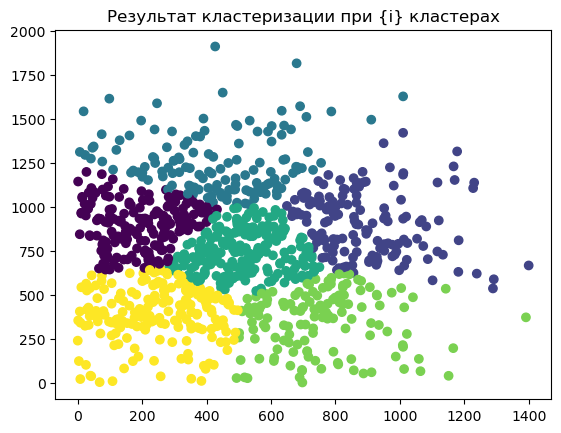

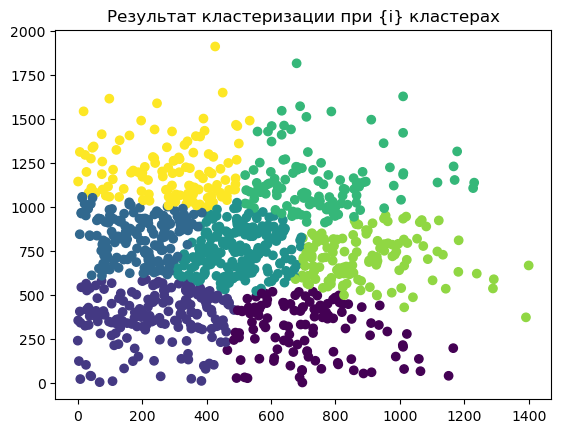

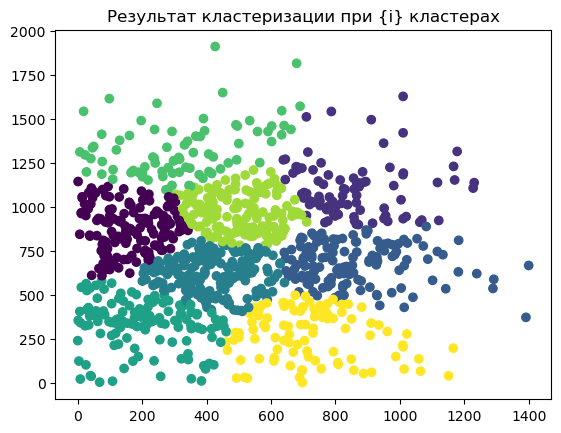

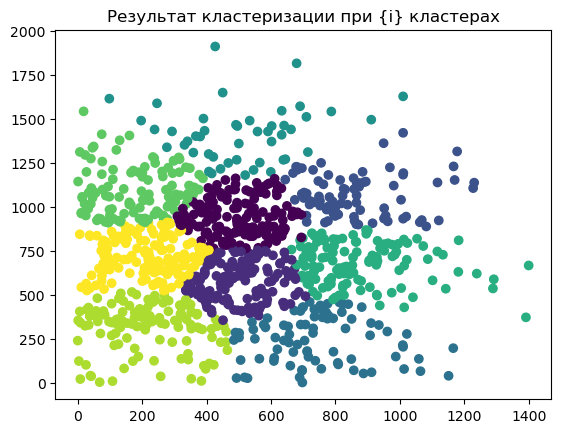

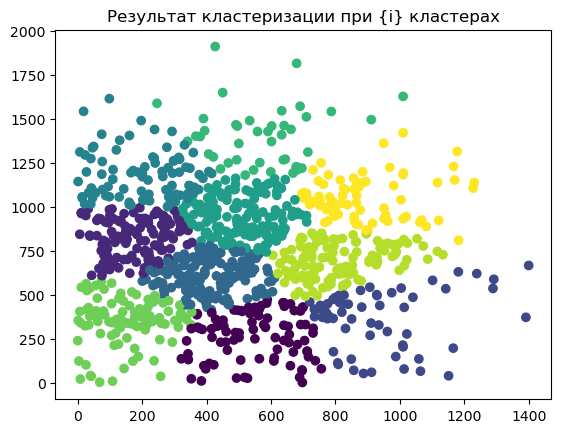

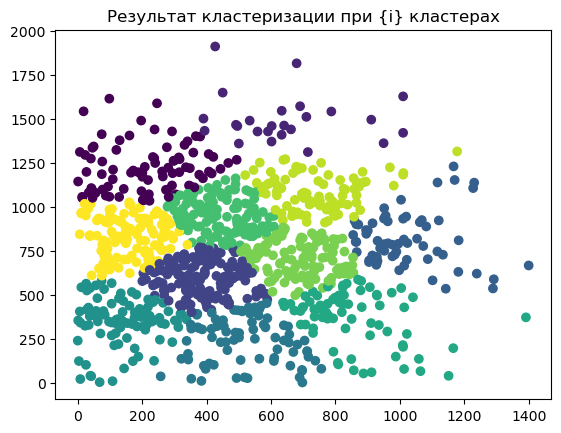

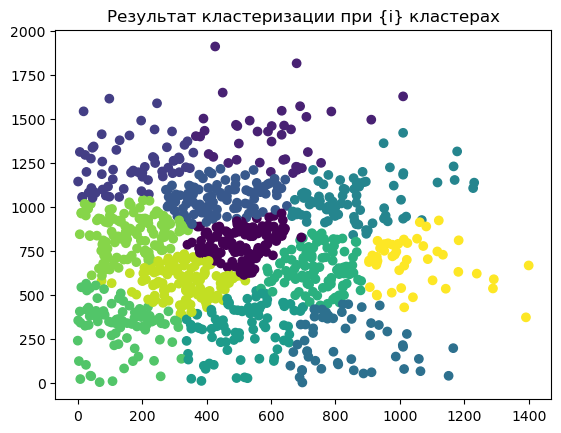

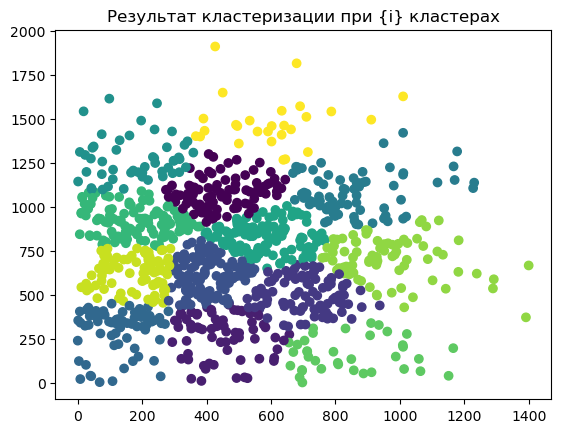

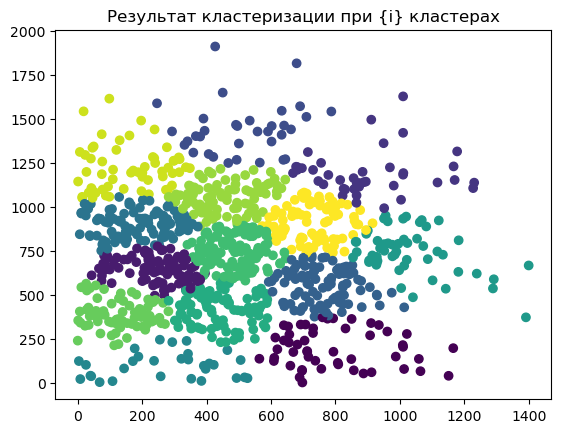

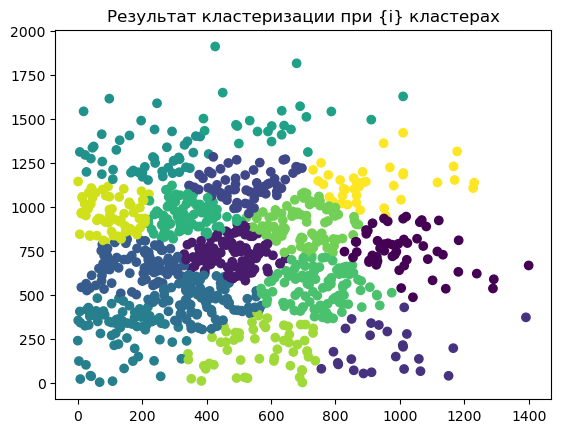

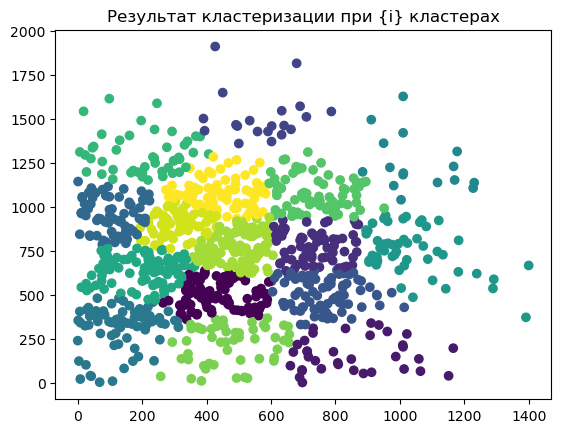

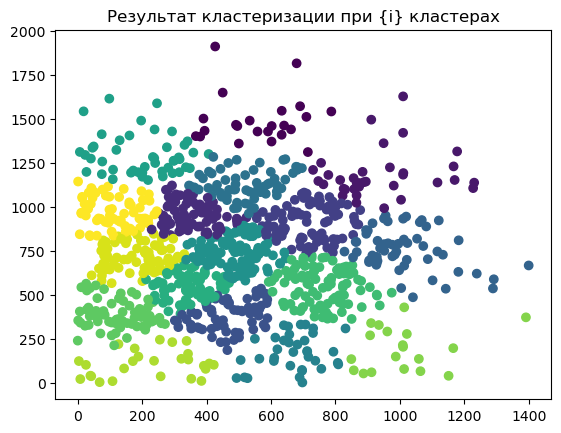

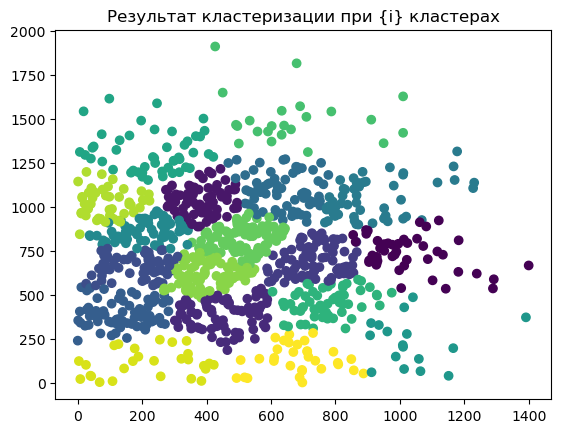

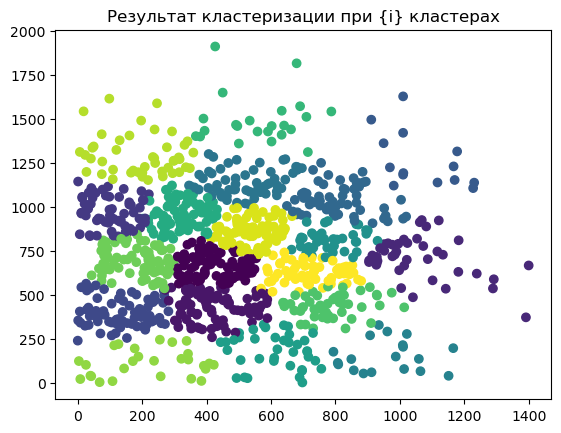

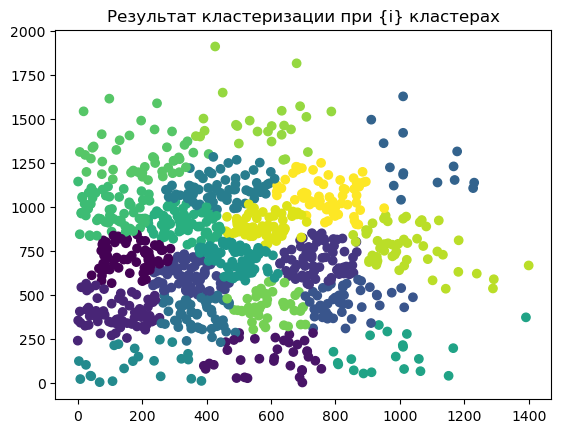

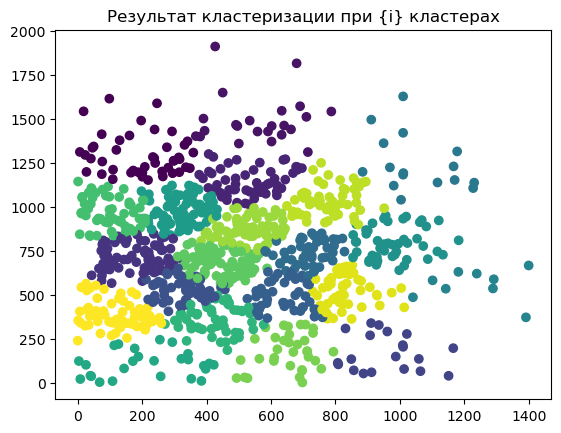

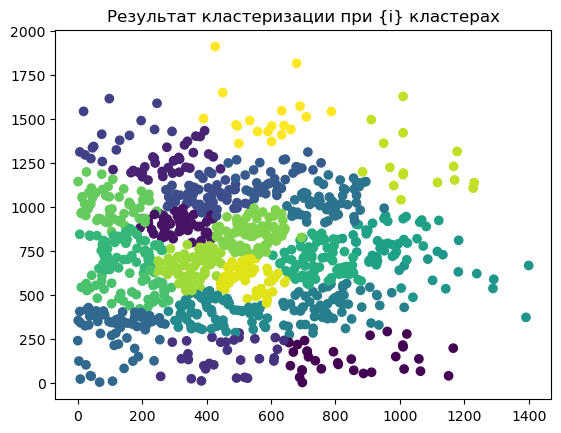

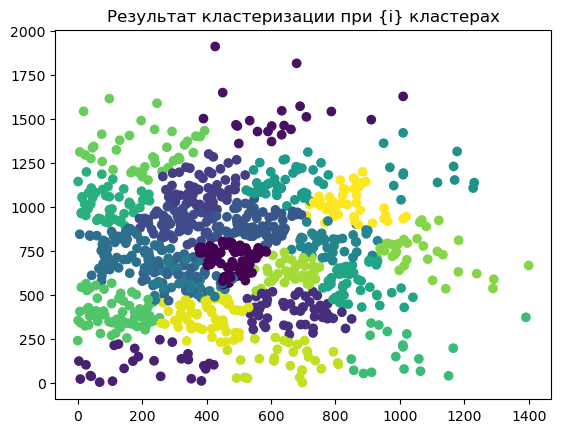

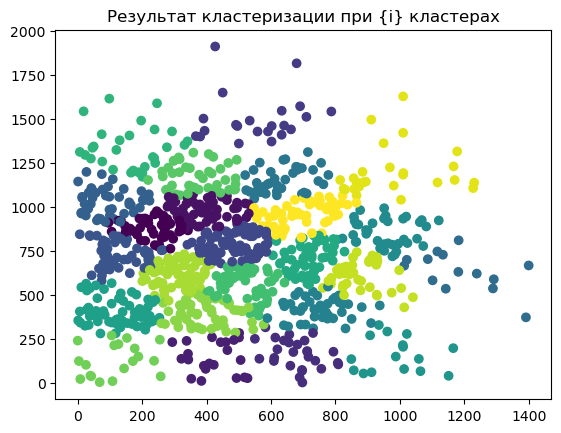

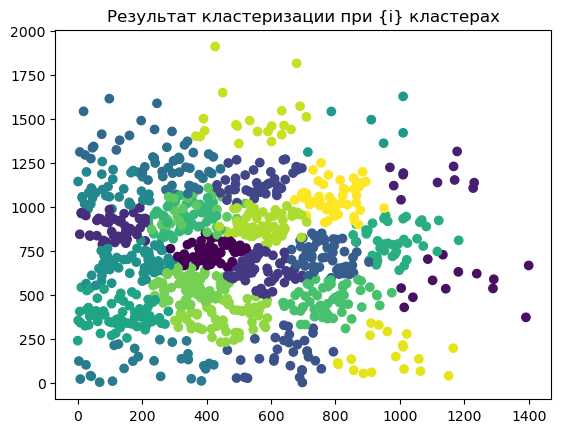

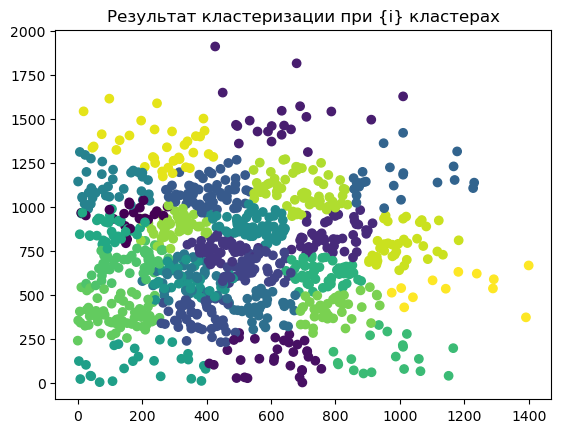

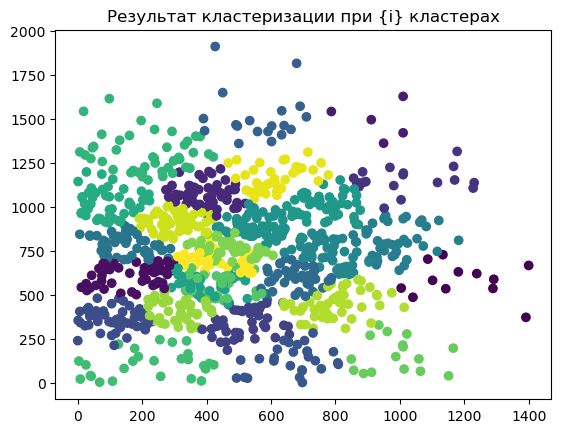

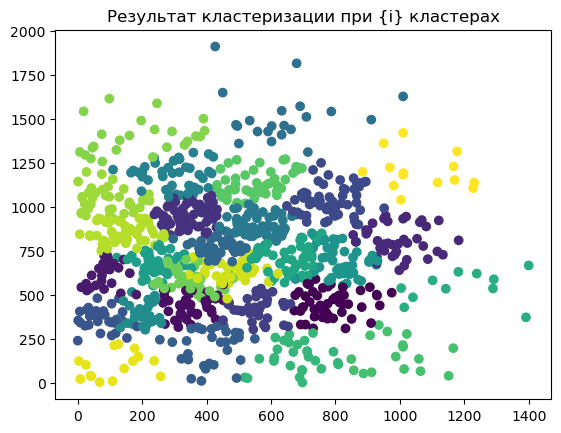

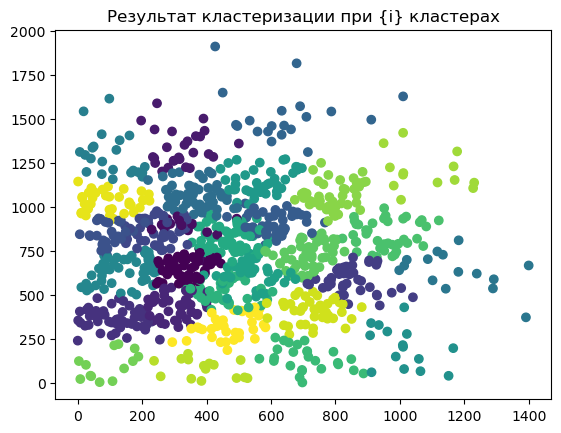

In [72]:
distortions=[]
for i in range(1,30):
    kmeans=KMeans(n_clusters=i,init='random', n_init=10, max_iter=300,tol=1e-04)
    kmeans_prediction=kmeans.fit_predict(X)
    plt.title("Результат кластеризации при {i} кластерах")
    plt.scatter(X[:,5],X[:,1], c=kmeans_prediction)
    
    plt.show()
    distortions.append(kmeans.inertia_)

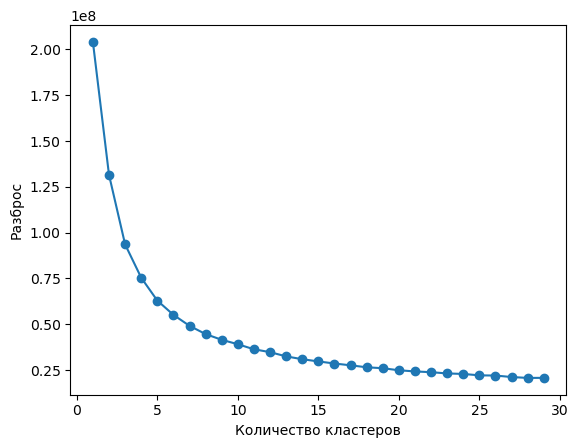

In [58]:
plt.plot(range(1,30),distortions, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Разброс')
plt.show()

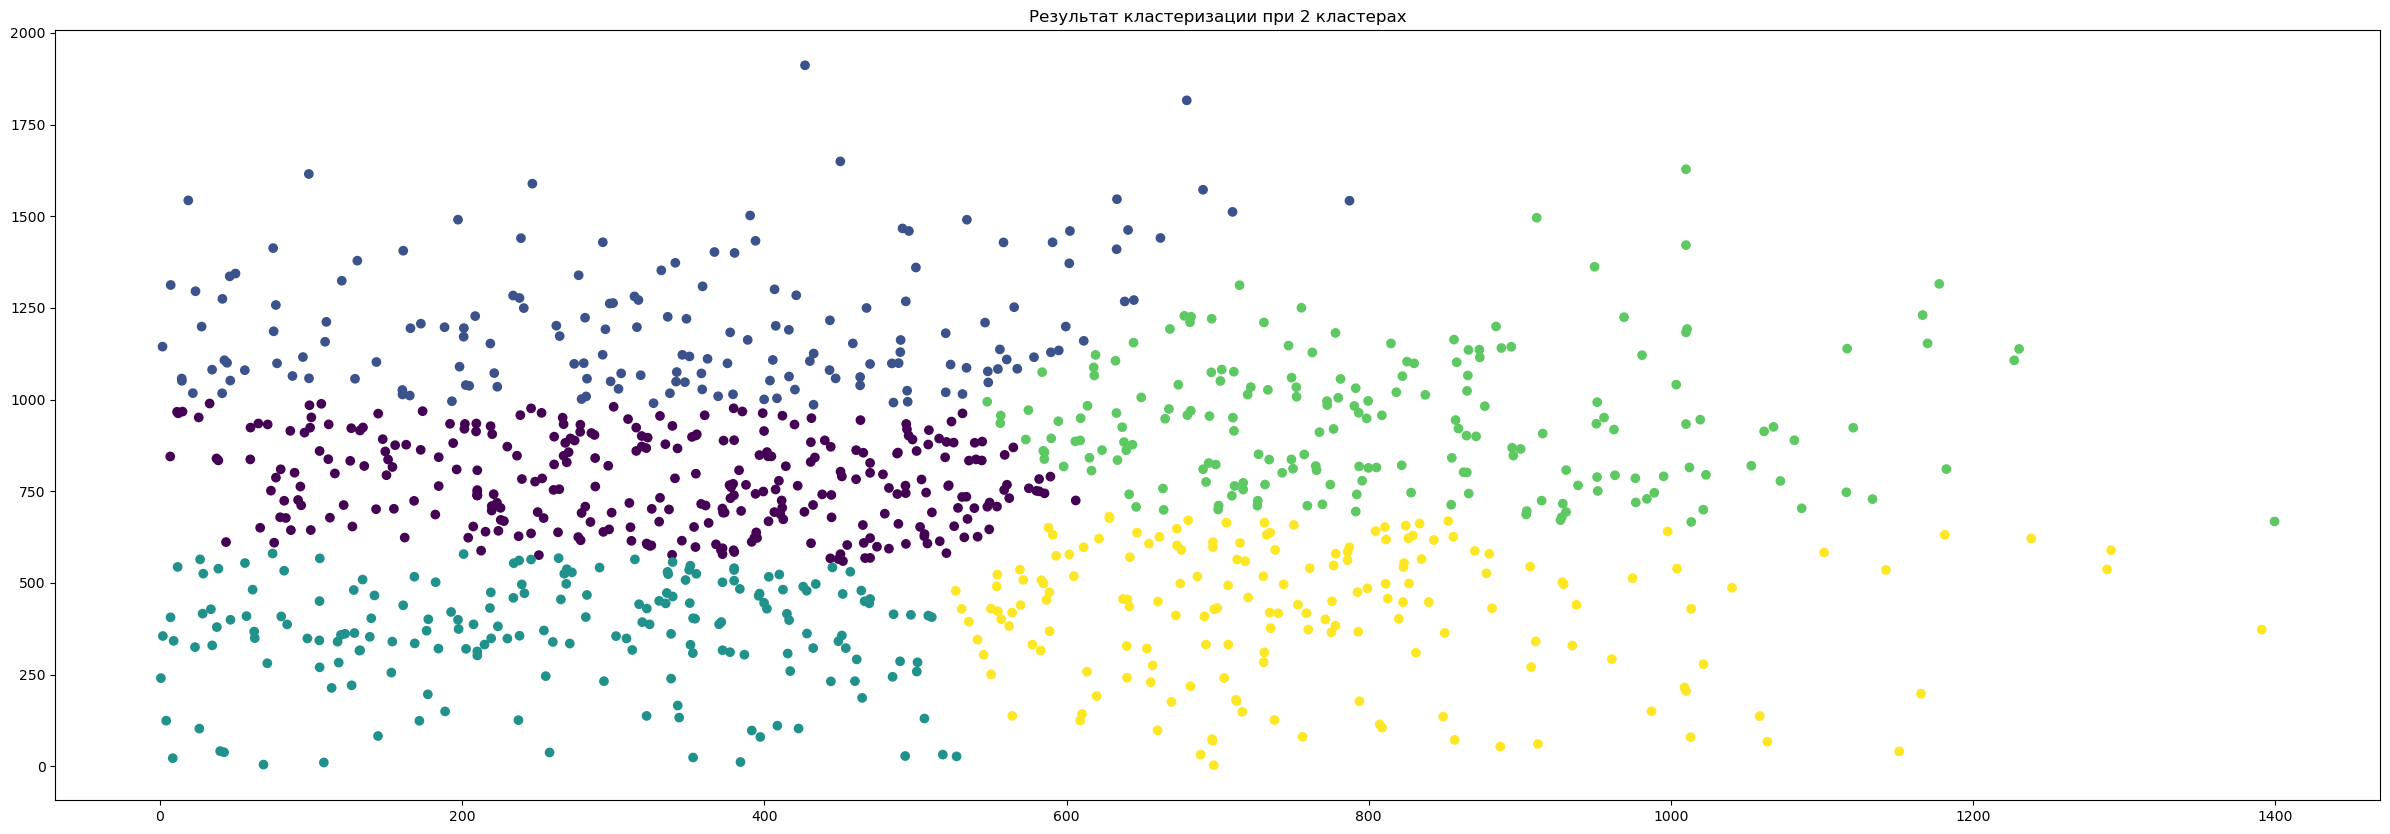

In [53]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,init='random', n_init=10, max_iter=300,tol=1e-04)
kmeans_prediction=kmeans.fit_predict(X)
plt.figure(figsize=(30, 10))
plt.title("Результат кластеризации при 2 кластерах")
plt.scatter(X[:,5],X[:,1], c=kmeans_prediction)
plt.show()
   

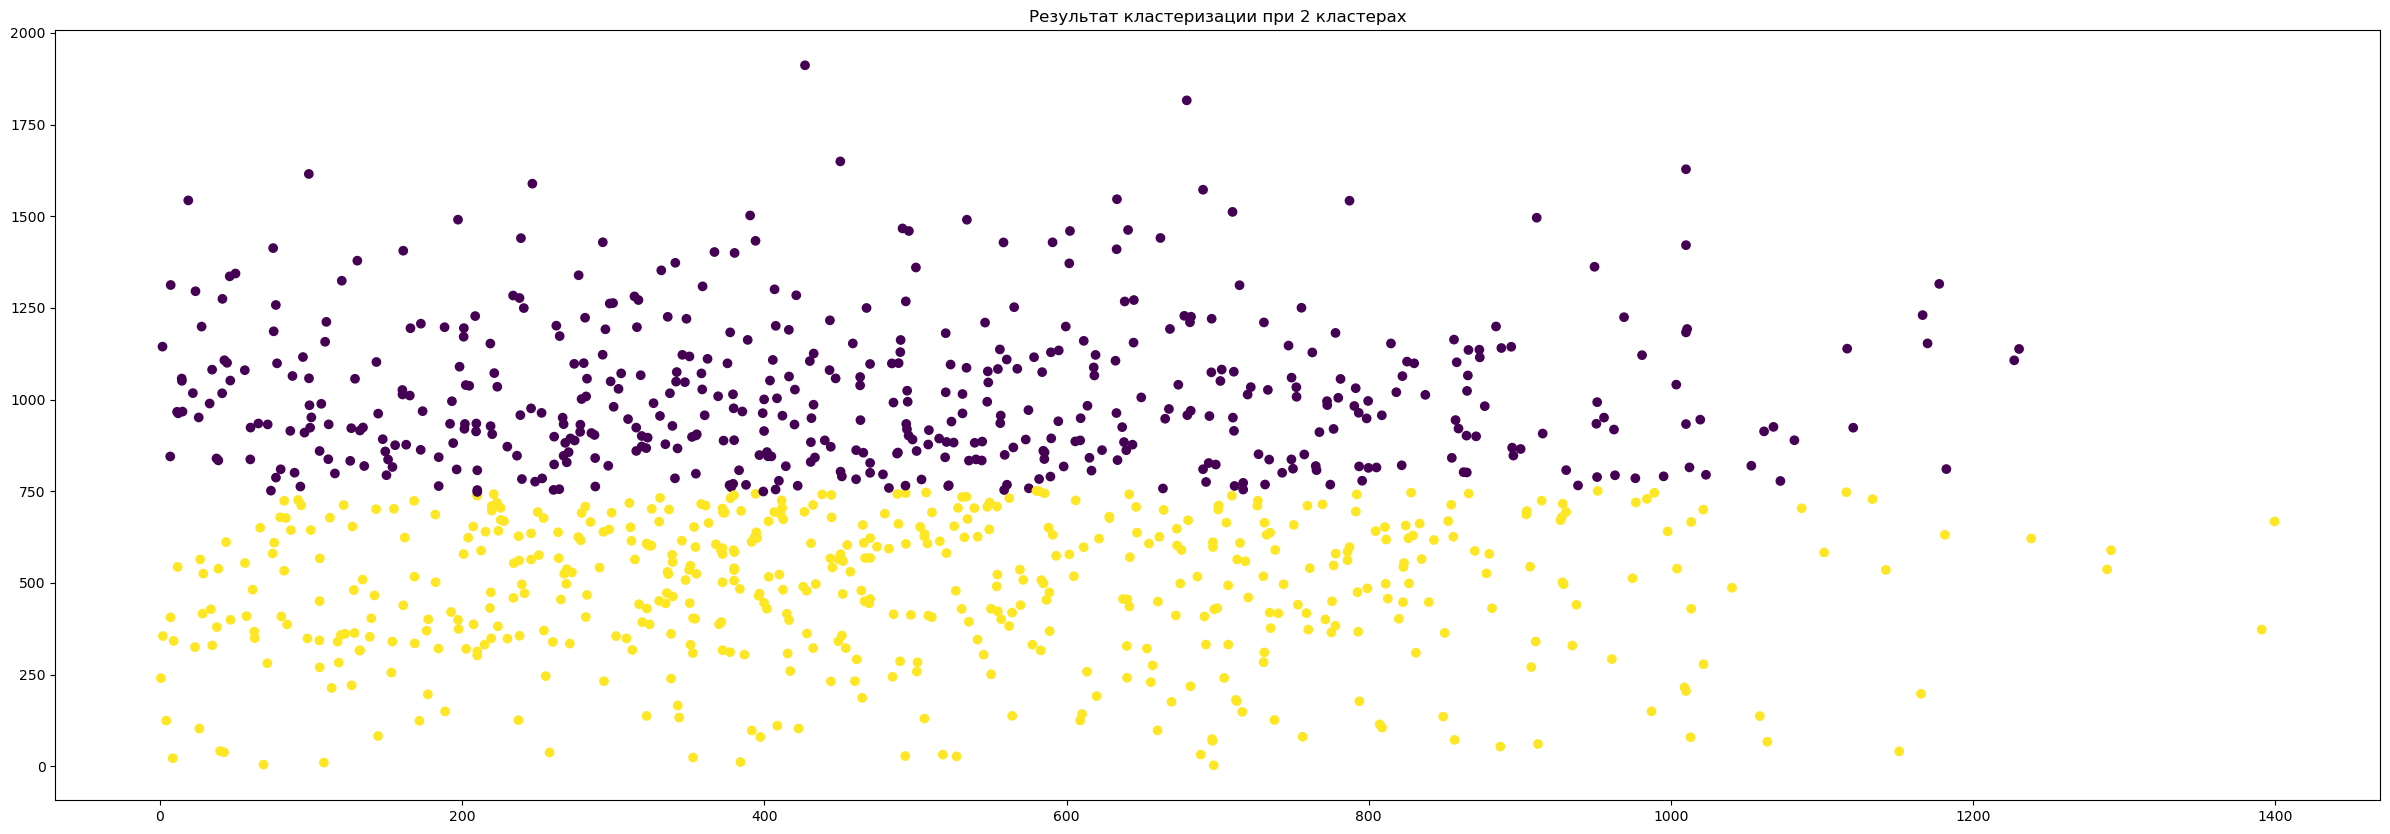

In [7]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,init='random', n_init=10, max_iter=300,tol=1e-04)
kmeans_prediction_1=kmeans.fit_predict(X)
plt.figure(figsize=(30, 10))
plt.title("Результат кластеризации при 2 кластерах")
plt.scatter(X[:,5],X[:,1], c=kmeans_prediction_1)
plt.show()

In [8]:
#df_clas = pd.DataFrame(data=kmeans_prediction,columns=['class_1'])
df_clas_2 = pd.DataFrame(data=kmeans_prediction_1,columns=['class_2'])
#df['class_1']=df_clas['class_1']
df['class_2']=df_clas_2['class_2']
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                    220.0                   0          4.0   
1                    220.0                   0          4.0   
2                    220.0                   0          4.0   
3                    220.0                   0          5.0   
4                    220.0                   0          5.0   

   Плотность нашивки  class_2  
0               57.0        1  
1               60.0        1  
2               70.0        1  
3               47.0        1  
4               57.0        0

In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
df_stand = scaler.fit_transform(np.array(df))
dataset_stand_df=pd.DataFrame(data=df_stand, columns=df.columns[:])
dataset_stand_df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                        -1.175779          0.736365              -0.003594   
1                        -1.175779          0.736365              -0.003594   
2                        -1.175779          0.736365              -0.003594   
3                        -1.175779          0.736365              -0.003594   
4                        -0.174232          0.736365               0.039618   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                    -2.848828                         0.009757   
1                    -2.141666                         0.626001   
2                    -2.145202                         4.471955   
3                     0.651622                        -0.413446   
4                     0.045585                         0.009757   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                 -4.542215                      -0.969964   
1                 -0.030955                      -0.969964   
2                 -0.030955                      -0.969964   
3                  0.344984                      -0.969964   
4                 -0.030955                      -0.969964   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                              -1.06772                       1.098244   
1                              -1.06772                       1.098244   
2                              -1.06772                       1.098244   
3                              -1.06772                       1.098244   
4                              -1.06772                       1.098244   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                  0.02641           -0.983518    -1.131530   
1                  0.02641           -0.983518    -1.131530   
2                  0.02641           -0.983518    -1.131530   
3                  0.02641           -0.983518    -0.741243   
4                  0.02641           -0.983518    -0.741243   

   Плотность нашивки   class_2  
0          -0.012469  0.968246  
1           0.230546  0.968246  
2           1.040595  0.968246  
3          -0.822518  0.968246  
4          -0.012469 -1.032796

In [10]:
y_stand=np.array(dataset_stand_df[['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа' ]])
X_stand=np.array(dataset_stand_df.drop(['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Соотношение матрица-наполнитель','Плотность нашивки'],axis=1))
y=np.array(df[['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа' ]])
X=np.array(df.drop(['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Соотношение матрица-наполнитель','Плотность нашивки'],axis=1))

In [11]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train_st, X_test_st,y_train_st,y_test_st=train_test_split(X_stand,y_stand,test_size=0.3,random_state=0)

In [12]:

models = [ 
          RandomForestRegressor( max_depth=150,max_features='sqrt', n_estimators=300 ),
          KNeighborsRegressor(n_neighbors=350), 
          GradientBoostingRegressor( n_estimators=300, loss='absolute_error'),
          tree.DecisionTreeRegressor(),
          SVR( epsilon =0.1),
          ARDRegression(n_iter=400),
          BaggingRegressor(base_estimator=RandomForestRegressor( max_depth=150,max_features='sqrt', n_estimators=300 ),
                           random_state=12, n_estimators=100)
       ]

In [13]:
TestModels = DataFrame()
 
tmp = {}

#для каждой модели из списка
for model in models:
    #получаем имя модели
    m = str(model)
    tmp['Model'] = m[:m.index('(')] 
    #для каждого столбцам результирующего набора
    for i in  range(y_train.shape[1]):
        #обучаем модель
        model.fit(X_train, y_train[:,i]) 
        #вычисляем коэффициент детерминации
        tmp['R2_Y%s'%str(i+1)] = r2_score(y_test[:,i], model.predict(X_test))
        tmp['mean_Y%s'%str(i+1)] = mean_squared_error(y_test[:,i], model.predict(X_test),squared=False)
        tmp['max_Y%s'%str(i+1)] = mean_absolute_error(y_test[:,i], model.predict(X_test))
        model.fit(X_train_st, y_train_st[:,i]) 
        #вычисляем коэффициент детерминации
        tmp['R2_Y_st%s'%str(i+1)] = r2_score(y_test_st[:,i], model.predict(X_test_st))
        tmp['mean_Y_st%s'%str(i+1)] = mean_squared_error(y_test_st[:,i], model.predict(X_test_st),squared=False)
        tmp['max_Y_st%s'%str(i+1)] = mean_absolute_error(y_test_st[:,i], model.predict(X_test_st))
        
    #записываем данные и итоговый DataFrame
    TestModels = TestModels.append([tmp])
    #TestModels = TestModels.append([tmp1])
    #TestModels = TestModels.append([tmp2])
#делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)


<AxesSubplot:title={'center':'mae_Y2'}, xlabel='Model'>

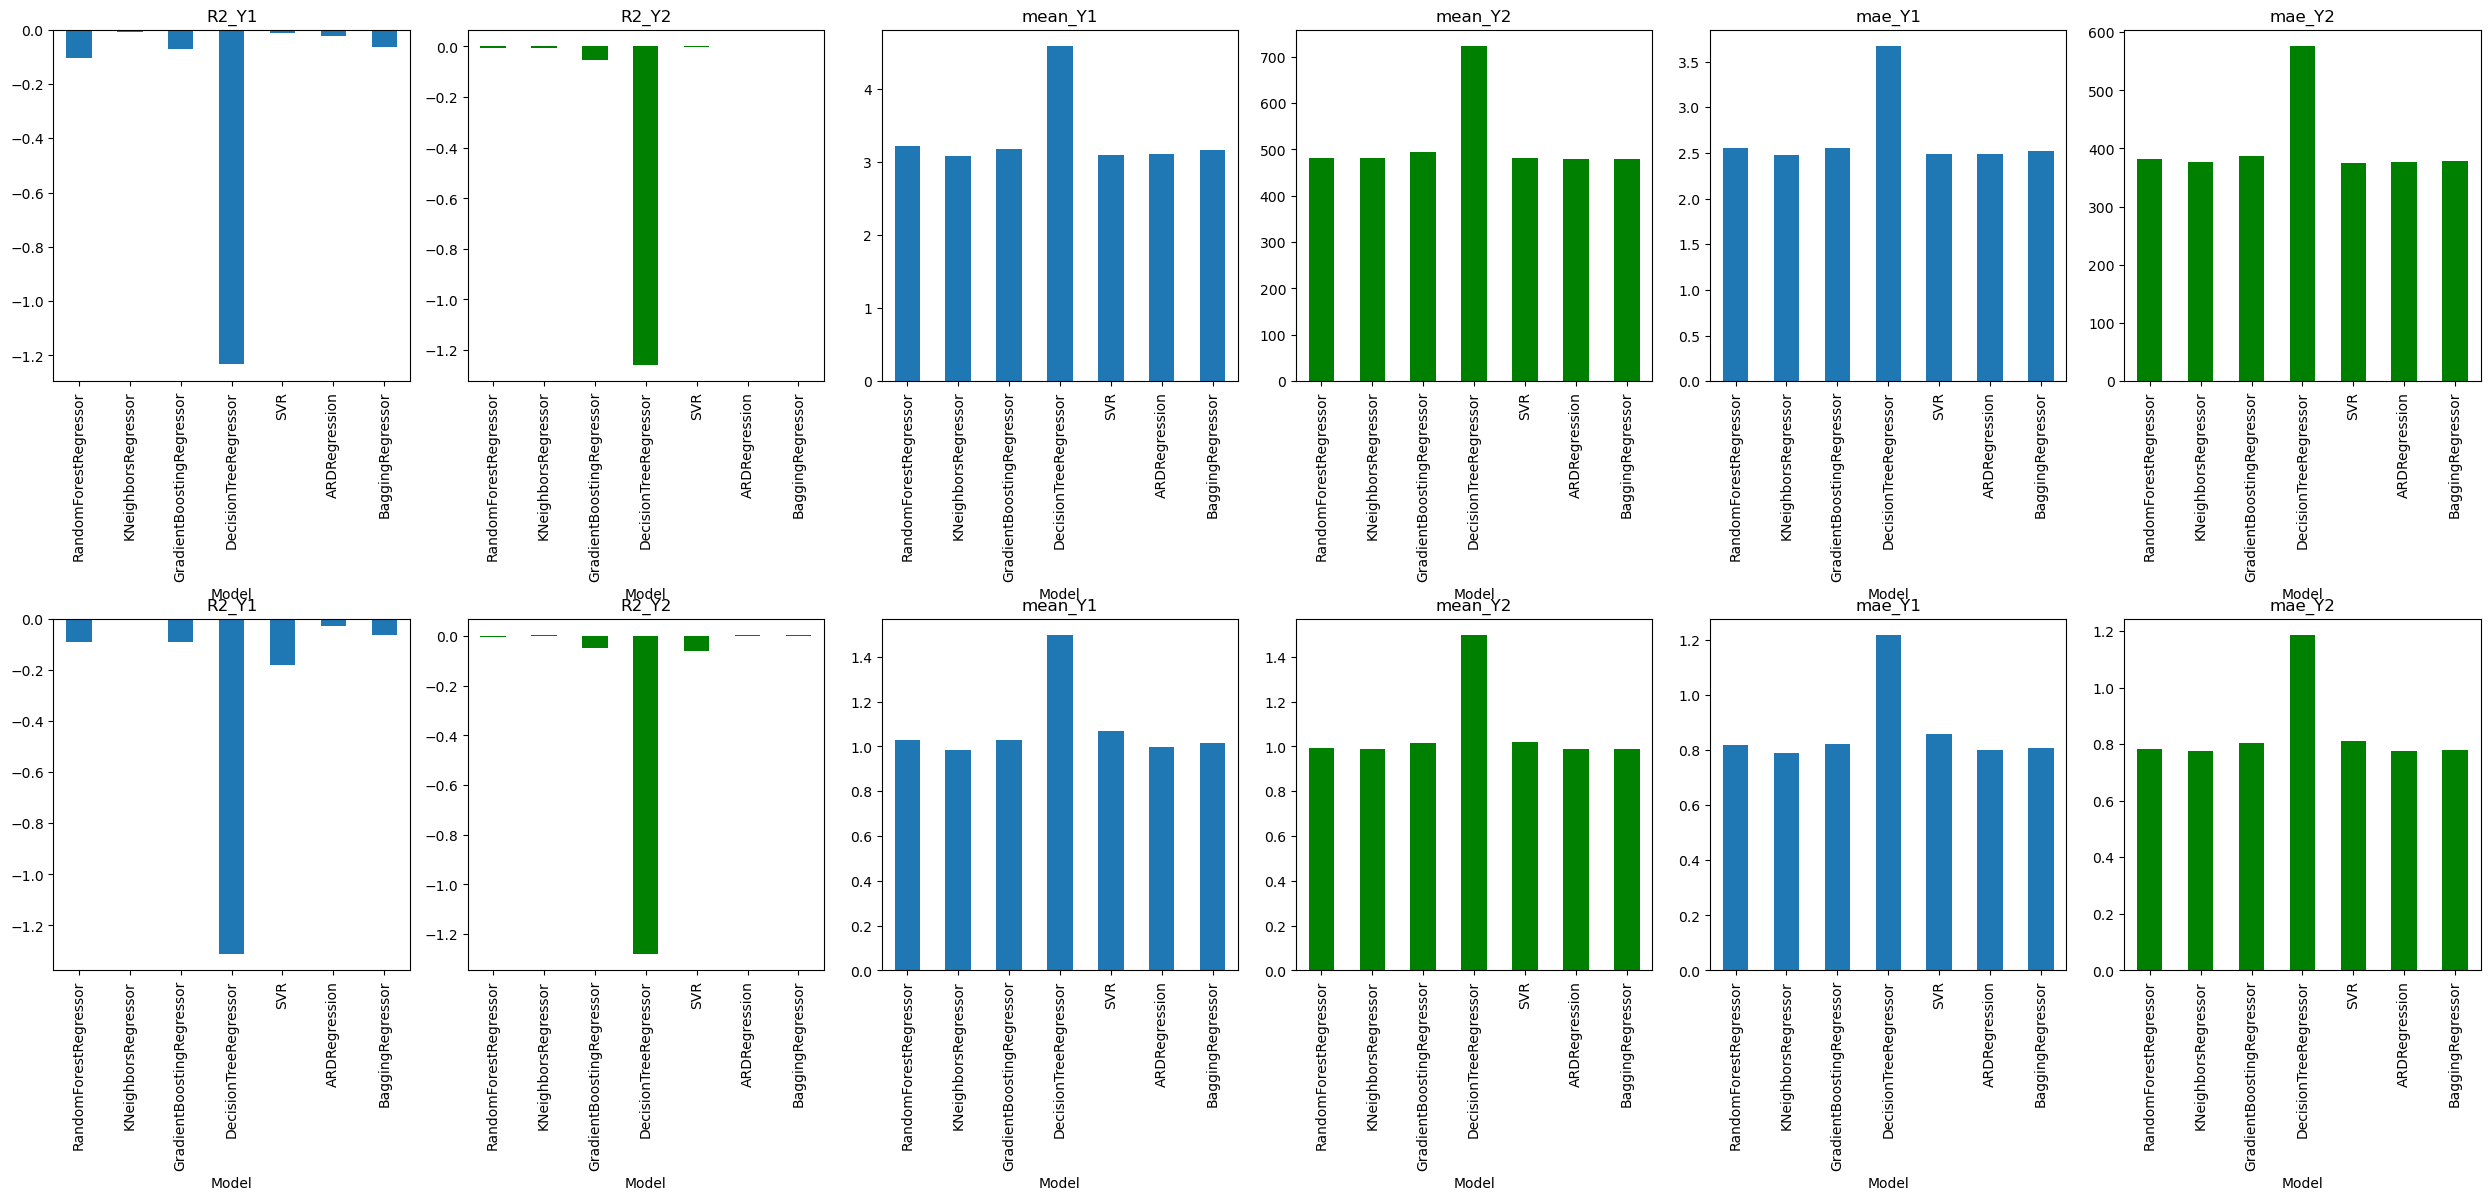

In [14]:
fig, axes = plt.subplots(ncols=6,nrows=2, figsize=(25,10))
fig. tight_layout (h_pad= 15)
TestModels.R2_Y1.plot(ax=axes[0,0], kind='bar', title='R2_Y1')
TestModels.R2_Y2.plot(ax=axes[0,1], kind='bar', color='green', title='R2_Y2')
TestModels.mean_Y1.plot(ax=axes[0,2], kind='bar', title='mean_Y1')
TestModels.mean_Y2.plot(ax=axes[0,3], kind='bar', color='green', title='mean_Y2')
TestModels.max_Y1.plot(ax=axes[0,4], kind='bar', title='mae_Y1')
TestModels.max_Y2.plot(ax=axes[0,5], kind='bar', color='green', title='mae_Y2')

TestModels.R2_Y_st1.plot(ax=axes[1,0], kind='bar', title='R2_Y1')
TestModels.R2_Y_st2.plot(ax=axes[1,1], kind='bar', color='green', title='R2_Y2')
TestModels.mean_Y_st1.plot(ax=axes[1,2], kind='bar', title='mean_Y1')
TestModels.mean_Y_st2.plot(ax=axes[1,3], kind='bar', color='green', title='mean_Y2')
TestModels.max_Y_st1.plot(ax=axes[1,4], kind='bar', title='mae_Y1')
TestModels.max_Y_st2.plot(ax=axes[1,5], kind='bar', color='green', title='mae_Y2')


In [17]:
TestModels.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'red', 
                       axis = 0)

In [51]:
tuned_parameters_br =[{'n_neighbors': [10,20,9,100,300,450,500,1000,250,100], 
                       'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                       'leaf_size': [30,50,60,40],
                       'p':[2,5,9,12,17,20]}]
clf_kn = GridSearchCV(KNeighborsRegressor(), tuned_parameters_br, cv=10, 
                   n_jobs=-1, verbose=1)
clf_kn.fit(X_train, y_train[:,0])

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'leaf_size': [30, 50, 60, 40],
                          'n_neighbors': [10, 20, 9, 100, 300, 450, 500, 1000,
                                          250, 100],
                          'p': [2, 5, 9, 12, 17, 20]}],
             verbose=1)

In [52]:
 print(clf_kn.best_estimator_)

KNeighborsRegressor(n_neighbors=500, p=5)


In [53]:
KNN=KNeighborsRegressor(n_neighbors=500, p=5)
knn_br=KNN.fit(X_train,y_train[:,0])

In [54]:
mae_kn = mean_absolute_error(y_test[:,0], knn_br.predict(X_test))
print(mae_kn)
r2_kn = r2_score(y_test[:,0], knn_br.predict(X_test))
print(r2_kn)

2.467618587777869
-0.00590748166418642


In [44]:
import pickle

pickle.dump(knn_br,open('knn_br_model.pkl','wb'))

In [55]:
tuned_parameters = {'n_estimators': [200, 500,350,250],
                    'max_depth': [100,150,60,200,300], 
                    'max_features': ['sqrt','log2'],
                    'min_samples_split' :[2,10,15,30,50,40],
                    
                   }
clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=10, 
                   n_jobs=-1, verbose=1)
clf.fit(X_train, y_train[:,1]) 

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [100, 150, 60, 200, 300],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 10, 15, 30, 50, 40],
                         'n_estimators': [200, 500, 350, 250]},
             verbose=1)

In [56]:
 print(clf.best_estimator_)

RandomForestRegressor(max_depth=300, max_features='log2', min_samples_split=50,
                      n_estimators=250)


In [57]:
#второй алгоритм
params = {'base_estimator': [None, RandomForestRegressor(max_depth=300, max_features='log2', min_samples_split=50,
                      n_estimators=250)],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}
bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=10, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, y_train[:,1])

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10, estimator=BaggingRegressor(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'base_estimator': [None,
                                            RandomForestRegressor(max_depth=300,
                                                                  max_features='log2',
                                                                  min_samples_split=50,
                                                                  n_estimators=250)],
                         'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0],
                         'n_estimators': [20, 50, 100]},
             verbose=1)

In [58]:
 print(bagging_regressor_grid.best_estimator_)

BaggingRegressor(bootstrap_features=True, max_features=0.5, n_estimators=100,
                 n_jobs=-1, random_state=1)


In [59]:
BAG=BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=300, max_features='sqrt', min_samples_split=50,
                      n_estimators=200),bootstrap_features=True, max_features=0.5, n_estimators=100,
                 n_jobs=-1, random_state=1)
bag_br=BAG.fit(X_train,y_train[:,1])

In [62]:
import pickle

pickle.dump(bag_br,open('bag_br_model.pkl','wb'))

In [60]:
mae_bag = mean_absolute_error(y_test[:,1], bag_br.predict(X_test))
print(mae_bag)
r2_bag = r2_score(y_test[:,1], bag_br.predict(X_test))
print(r2_bag)

375.646589723827
0.01011728747260765


In [18]:
#нейронная сеть
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow import keras

import tensorflow


In [19]:
minmax_scaler=MinMaxScaler()
dataset_norm=minmax_scaler.fit_transform(np.array(df))
dataset_norm_df=pd.DataFrame(data=dataset_norm, columns=df.columns[:])


In [20]:
y=np.array(dataset_norm_df[['Соотношение матрица-наполнитель']])
X=np.array(dataset_norm_df.drop(['Соотношение матрица-наполнитель'],axis=1))


In [21]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape[1]

13

In [22]:
model = Sequential()
model.add(Dense(13, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(8, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1,activation='tanh'))


model_1 = Sequential()
model_1.add(Dense(13, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model_1.add(Dense(192, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dense(192, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dense(1, activation='relu'))


model_2 = Sequential()
model_2.add(Dense(13, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model_2.add(Dense(33, activation='tanh'))
model_2.add(Dense(1, activation='tanh'))

model_3 = Sequential()
model_3.add(Dense(13, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model_3.add(Dense(8, activation='tanh'))
model_3.add(Dense(1, activation='tanh'))

In [23]:
print(model.summary())
print(model_1.summary())
print(model_2.summary())
print(model_3.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 batch_normalization (BatchN  (None, 13)               52        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 8)                 112       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
 batch_normalization_1 (Batc  (None, 1)                4         
 hNormalization)                                        

In [24]:

model.compile(
    optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
    loss='mean_absolute_error')
model_1.compile(
    optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
    loss='mean_absolute_error')
model_2.compile(
    optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
    loss='mean_absolute_error')
model_3.compile(
    optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
    loss='mean_absolute_error')

In [25]:
history = model.fit(X_train, y_train, epochs=100,validation_split=0.1, verbose=1)
history_1 = model_1.fit(X_train, y_train, epochs=100,validation_split=0.1, verbose=1)
history_2 = model_2.fit(X_train, y_train, epochs=100,validation_split=0.1, verbose=1)
history_3 = model_3.fit(X_train, y_train, epochs=100,validation_split=0.1, verbose=1)
 

Epoch 1/100
21/21 [==============================] - 1s 8ms/step - loss: 0.4072 - val_loss: 0.1446
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1445 - val_loss: 0.1307
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1442 - val_loss: 0.1438
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1442 - val_loss: 0.1341
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1430 - val_loss: 0.1575
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1436 - val_loss: 0.1279
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1428 - val_loss: 0.1296
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1417 - val_loss: 0.1567
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1429 - val_loss: 0.1390
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1420 - val_loss: 0.1301
Epoch 11/

21/21 [==============================] - 0s 2ms/step - loss: 0.1427 - val_loss: 0.1319
Epoch 84/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1431 - val_loss: 0.1536
Epoch 85/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1434 - val_loss: 0.1580
Epoch 86/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1444 - val_loss: 0.1499
Epoch 87/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1428 - val_loss: 0.1396
Epoch 88/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1416 - val_loss: 0.1508
Epoch 89/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1432 - val_loss: 0.1357
Epoch 90/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1435 - val_loss: 0.1632
Epoch 91/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1428 - val_loss: 0.1852
Epoch 92/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1361
Epoch 93/100


21/21 [==============================] - 0s 4ms/step - loss: 0.4542 - val_loss: 0.6735
Epoch 66/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4556 - val_loss: 0.5450
Epoch 67/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4463 - val_loss: 0.4552
Epoch 68/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4313 - val_loss: 1.8768
Epoch 69/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5017 - val_loss: 0.4163
Epoch 70/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4221 - val_loss: 0.4277
Epoch 71/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4307 - val_loss: 0.4452
Epoch 72/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4324 - val_loss: 0.5573
Epoch 73/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4376 - val_loss: 0.4498
Epoch 74/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4311 - val_loss: 0.4206
Epoch 75/100


21/21 [==============================] - 0s 1ms/step - loss: 0.1390 - val_loss: 0.1336
Epoch 48/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1314
Epoch 49/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1391 - val_loss: 0.1408
Epoch 50/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1392 - val_loss: 0.1312
Epoch 51/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1409 - val_loss: 0.1355
Epoch 52/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1401 - val_loss: 0.1328
Epoch 53/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1389 - val_loss: 0.1380
Epoch 54/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1403 - val_loss: 0.1656
Epoch 55/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1402 - val_loss: 0.1613
Epoch 56/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1400 - val_loss: 0.1645
Epoch 57/100


21/21 [==============================] - 0s 1ms/step - loss: 0.1440 - val_loss: 0.1316
Epoch 30/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1415 - val_loss: 0.1644
Epoch 31/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1434 - val_loss: 0.1940
Epoch 32/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1450 - val_loss: 0.1317
Epoch 33/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1424 - val_loss: 0.1324
Epoch 34/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1415 - val_loss: 0.1391
Epoch 35/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1430 - val_loss: 0.1544
Epoch 36/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1421 - val_loss: 0.1710
Epoch 37/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1416 - val_loss: 0.1617
Epoch 38/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1423 - val_loss: 0.1466
Epoch 39/100


In [26]:
pred = model.predict(X_test)
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)
err = np.mean(abs(pred - y_test))
print(err)
err_1 = np.mean(abs(pred_1 - y_test))
print(err_1)
err_2 = np.mean(abs(pred_2 - y_test))
print(err_2)
err_3 = np.mean(abs(pred_3 - y_test))
print(err_3)

0.1488700033040666
0.3718405391511062
0.1495105010650677
0.14497876804216553


In [27]:
res_mod = np.array( history.history['val_loss'])
res_mod1 = np.array( history_1.history['val_loss'])
res_mod2 = np.array( history_2.history['val_loss'])
res_mod3 = np.array( history_3.history['val_loss'])
print(res_mod.mean())
print(res_mod1.mean())
print(res_mod2.mean())
print(res_mod3.mean())

0.14580337807536126
0.5566651251912117
0.15353177919983862
0.1516060511767864


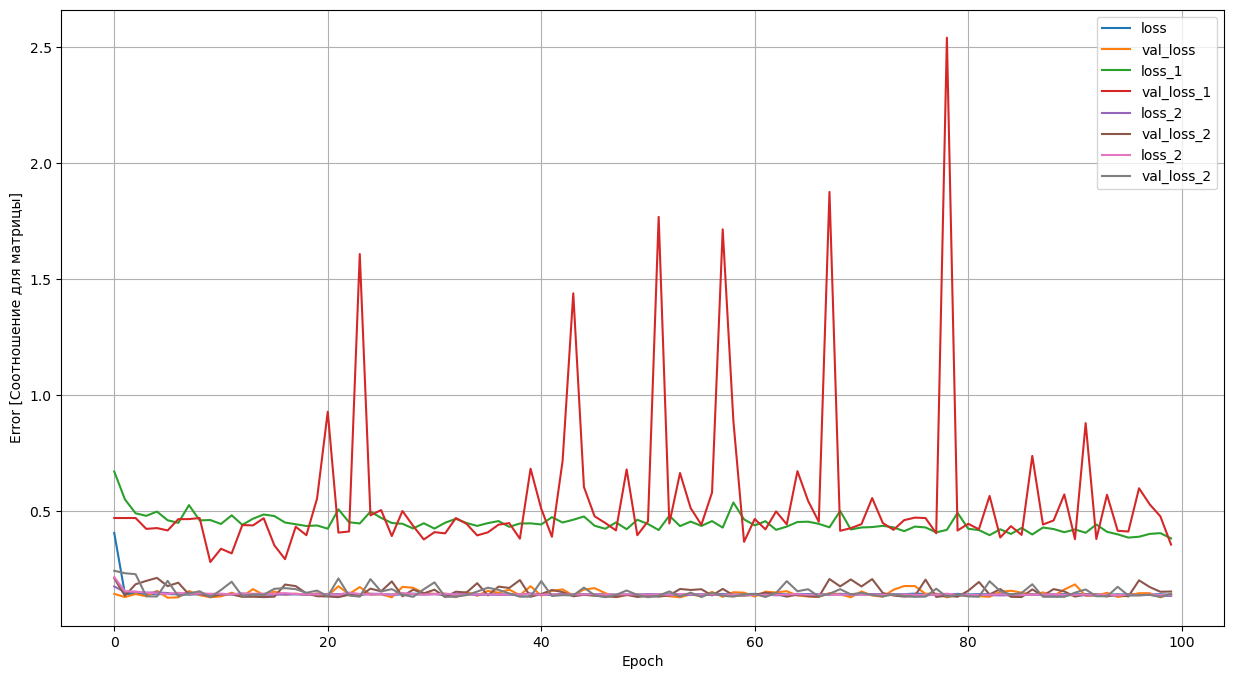

In [28]:
plt.figure(figsize=(15, 8))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history_1.history['loss'], label='loss_1')
plt.plot(history_1.history['val_loss'], label='val_loss_1')
plt.plot(history_2.history['loss'], label='loss_2')
plt.plot(history_2.history['val_loss'], label='val_loss_2')
plt.plot(history_3.history['loss'], label='loss_2')
plt.plot(history_3.history['val_loss'], label='val_loss_2')
plt.xlabel('Epoch')
plt.ylabel('Error [Соотношение для матрицы]')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1500x1000 with 0 Axes>

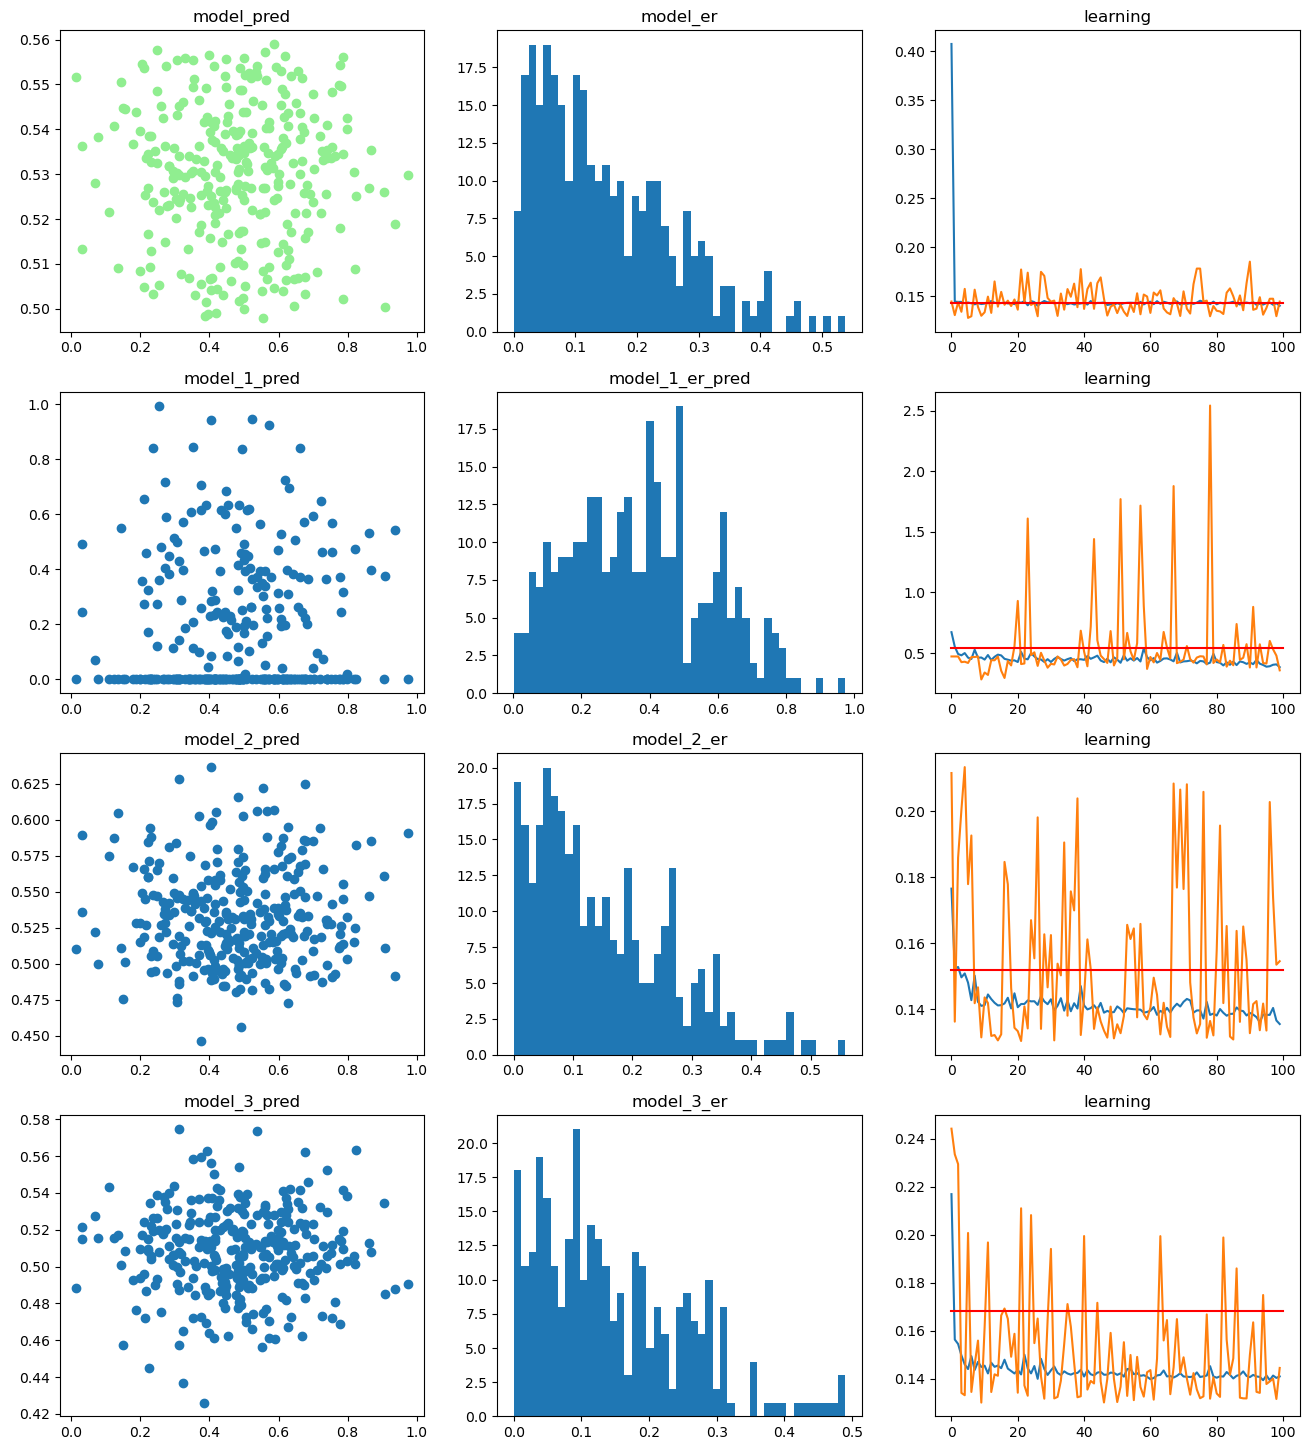

In [29]:
fig = plt.figure(figsize=(15, 10))
fig,axis = plt.subplots(4, 3,figsize=(16, 18))
x = [0,100]   
y = [0.143,0.143]   
y1 = [0.545,0.545]  
y2 = [0.152,0.152]  
y3 = [0.168,0.168]  
   
   

   
# model
axis[0, 0].scatter(y_test, pred,c='lightgreen')
axis[0, 0].set_title("model_pred")
# For Cosine Function
axis[0, 1].hist(abs(pred - y_test),bins=45)
axis[0, 1].set_title("model_er")
axis[0, 2].plot(history.history['loss'], label='loss')
axis[0, 2].plot(history.history['val_loss'], label='val_loss')
axis[0, 2].plot(x,y,c='red')
axis[0, 2].set_title("learning")
# model_1
axis[1, 0].scatter(y_test, pred_1)
axis[1, 0].set_title("model_1_pred")
axis[1, 1].hist(abs(pred_1 - y_test),bins=45)
axis[1, 1].set_title("model_1_er_pred")
axis[1, 2].plot(history_1.history['loss'], label='loss')
axis[1, 2].plot(history_1.history['val_loss'], label='val_loss')
axis[1, 2].set_title("learning")
axis[1, 2].plot(x,y1,c='red')
#model_2
axis[2, 0].scatter(y_test, pred_2)
axis[2, 0].set_title("model_2_pred")
axis[2, 1].hist(abs(pred_2 - y_test),bins=45)
axis[2, 1].set_title("model_2_er")
axis[2, 2].plot(history_2.history['loss'], label='loss')
axis[2, 2].plot(history_2.history['val_loss'], label='val_loss')
axis[2, 2].set_title("learning")
axis[2, 2].plot(x,y2,c='red')
#model_3
axis[3, 0].scatter(y_test, pred_3)
axis[3, 0].set_title("model_3_pred")
axis[3, 1].hist(abs(pred_3 - y_test),bins=45)
axis[3, 1].set_title("model_3_er")
axis[3, 2].plot(history_3.history['loss'], label='loss')
axis[3, 2].plot(history_3.history['val_loss'], label='val_loss')
axis[3, 2].set_title("learning")
axis[3, 2].plot(x,y3,c='red')
  
# Combine all the operations and display
plt.show()

In [30]:
model_json=model.to_json()
with open('mod.json','w') as json_file:
    json_file.write(model_json)

model.save_weights("mod.h5")
print('модель сохранена')

модель сохранена


In [80]:

from keras.models import model_from_json
json_file=open('mod.json','r')
loaded_model_json=json_file.read()
json_file.close()

loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights('mod.h5')

In [81]:
XX=[[23,32,321,431,324,324,234,523,435,23,432,43,1]]
pred=loaded_model.predict(XX)

In [82]:
pred

array([[0.6145984]], dtype=float32)